In [1]:
# 1) Delivery_time -> Predict delivery time using sorting time 
# 2) Salary_hike -> Build a prediction model for Salary_hike

# Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
# 1) Delivery_time -> Predict delivery time using sorting time 

In [4]:
df1= pd.read_csv('delivery_time.csv')
df1

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
df1.shape

(21, 2)

In [6]:
df1.size

42

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [8]:
df1.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [9]:
df1.duplicated().any()

False

In [10]:
target1=df1[['Delivery Time']]
target1

,Delivery Time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


In [11]:
feature1=df1[['Sorting Time']]
feature1

,Sorting Time
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [12]:
feature1['Sorting Time']

0     10
1      4
2      6
3      9
4     10
5      6
6      7
7      3
8     10
9      9
10     8
11     4
12     7
13     3
14     3
15     4
16     6
17     7
18     2
19     7
20     5
Name: Sorting Time, dtype: int64

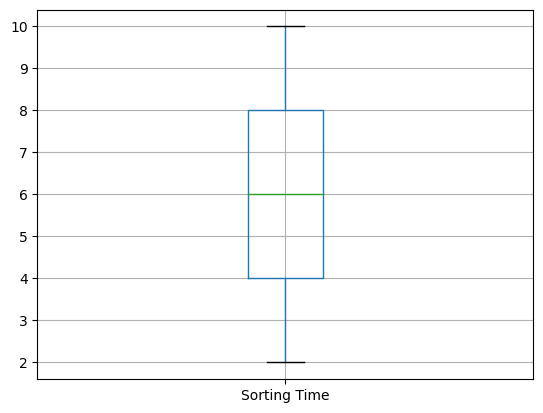

In [13]:
feature1.boxplot('Sorting Time')
plt.show()

In [14]:
x_train1,x_test1,y_train1,y_test1=train_test_split(feature1,target1,train_size=0.75,random_state=3)

In [15]:
lin_model= LinearRegression()

In [16]:
lin_model.fit(x_train1,y_train1)

LinearRegression()

In [17]:
y_pred1=lin_model.predict(x_test1)
y_pred1

array([[17.91962219],
       [11.342291  ],
       [12.98662379],
       [16.27528939],
       [ 9.6979582 ],
       [12.98662379]])

In [18]:
lin_model.score(x_test1,y_test1)

0.7921908671122742

In [19]:
lin_model.intercept_

array([6.4092926])

In [20]:
lin_model.coef_

array([[1.6443328]])

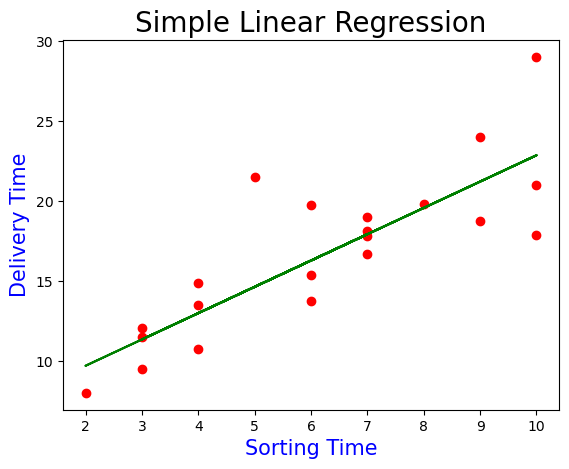

In [21]:
plt.scatter(df1['Sorting Time'], df1['Delivery Time'],color='red')
plt.xlabel('Sorting Time',size=15,color='blue')
plt.ylabel('Delivery Time',size=15,color='blue')
plt.title('Simple Linear Regression',size=20,color='black')
plt.plot(df1['Sorting Time'], lin_model.predict(df1[['Sorting Time']]),color='green')
plt.show()

### Squareroot Transformation

In [22]:
df1[['feature1_st','target1_st']]=np.sqrt(df1[['Sorting Time','Delivery Time']])
df1

,Delivery Time,Sorting Time,feature1_st,target1_st
0,21.00,10,3.162278,4.582576
1,13.50,4,2.000000,3.674235
2,19.75,6,2.449490,4.444097
3,24.00,9,3.000000,4.898979
4,29.00,10,3.162278,5.385165
5,15.35,6,2.449490,3.917908
6,19.00,7,2.645751,4.358899
7,9.50,3,1.732051,3.082207
8,17.90,10,3.162278,4.230839
9,18.75,9,3.000000,4.330127


In [23]:
target1_st=df1[['target1_st']]
target1_st

,target1_st
0,4.582576
1,3.674235
2,4.444097
3,4.898979
4,5.385165
5,3.917908
6,4.358899
7,3.082207
8,4.230839
9,4.330127


In [24]:
feature1_st=df1[['feature1_st']]
feature1_st

,feature1_st
0,3.162278
1,2.000000
2,2.449490
3,3.000000
4,3.162278
5,2.449490
6,2.645751
7,1.732051
8,3.162278
9,3.000000


In [25]:
model_st=LinearRegression()

In [26]:
x_train1,x_test1,y_train1,y_test1=train_test_split(feature1_st,target1_st,train_size=0.75,random_state=3)

In [27]:
model_st.fit(x_train1,y_train1)

LinearRegression()

In [28]:
y_pred1=model_st.predict(x_test1)
y_pred1

array([[4.23432344],
       [3.31109896],
       [3.58184113],
       [4.03601613],
       [2.98994873],
       [3.58184113]])

In [29]:
model_st.score(x_test1,y_test1)

0.8330667777064761

In [30]:
model_st.intercept_

array([1.56099409])

In [31]:
model_st.coef_

array([[1.01042352]])

In [32]:
rmse1=np.sqrt(mean_squared_error(y_test1,y_pred1))
rmse1

0.21743614669354314

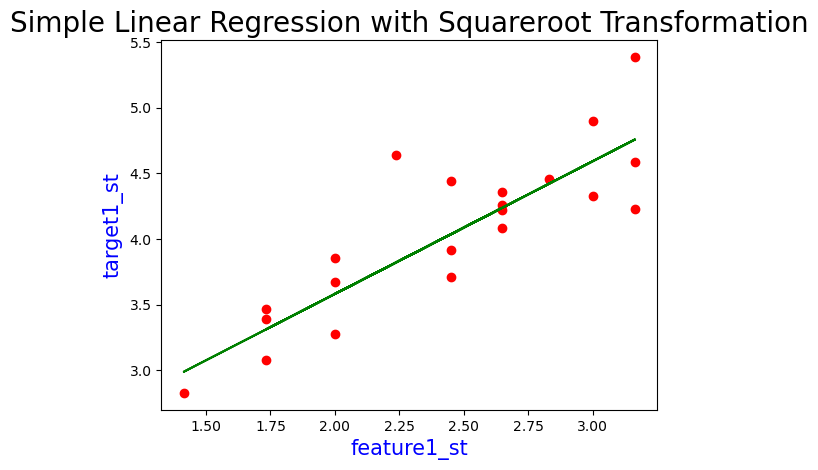

In [33]:
plt.scatter(df1['feature1_st'],df1['target1_st'],color='red')
plt.xlabel('feature1_st',size=15,color='blue')
plt.ylabel('target1_st',size=15,color='blue')
plt.title('Simple Linear Regression with Squareroot Transformation',size=20,color='black')
plt.plot(df1['feature1_st'],model_st.predict(df1[['feature1_st']]),color='green')
plt.show()

### Log Transformation

In [34]:
df1[['feature1_lt','target1_lt']]=np.log(df1[['Sorting Time','Delivery Time']])
df1

,Delivery Time,Sorting Time,feature1_st,target1_st,feature1_lt,target1_lt
0,21.00,10,3.162278,4.582576,2.302585,3.044522
1,13.50,4,2.000000,3.674235,1.386294,2.602690
2,19.75,6,2.449490,4.444097,1.791759,2.983153
3,24.00,9,3.000000,4.898979,2.197225,3.178054
4,29.00,10,3.162278,5.385165,2.302585,3.367296
5,15.35,6,2.449490,3.917908,1.791759,2.731115
6,19.00,7,2.645751,4.358899,1.945910,2.944439
7,9.50,3,1.732051,3.082207,1.098612,2.251292
8,17.90,10,3.162278,4.230839,2.302585,2.884801
9,18.75,9,3.000000,4.330127,2.197225,2.931194


In [35]:
target1_lt=df1[['target1_lt']]
target1_lt

,target1_lt
0,3.044522
1,2.602690
2,2.983153
3,3.178054
4,3.367296
5,2.731115
6,2.944439
7,2.251292
8,2.884801
9,2.931194


In [36]:
feature1_lt=df1[['feature1_lt']]
feature1_lt

,feature1_lt
0,2.302585
1,1.386294
2,1.791759
3,2.197225
4,2.302585
5,1.791759
6,1.945910
7,1.098612
8,2.302585
9,2.197225


In [37]:
model_lt=LinearRegression()

In [38]:
x_train1,x_test1,y_train1,y_test1=train_test_split(feature1_lt,target1_lt,train_size=0.75,random_state=3)

In [39]:
model_lt.fit(x_train1,y_train1)

LinearRegression()

In [40]:
y_pred1=model_lt.predict(x_test1)
y_pred1

array([[2.88754146],
       [2.36818266],
       [2.54451996],
       [2.79305342],
       [2.1196492 ],
       [2.54451996]])

In [41]:
model_lt.score(x_test1,y_test1)

0.8663576134997112

In [42]:
model_lt.intercept_

array([1.69477843])

In [43]:
model_lt.coef_

array([[0.61295894]])

In [44]:
rmse1=np.sqrt(mean_squared_error(y_test1,y_pred1))
rmse1

0.10867593679638445

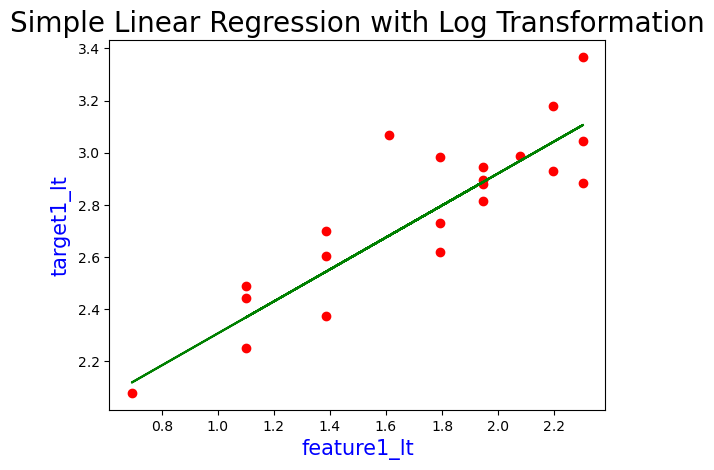

In [45]:
plt.scatter(df1['feature1_lt'], df1['target1_lt'],color='red')
plt.xlabel('feature1_lt',size=15,color='blue')
plt.ylabel('target1_lt',size=15,color='blue')
plt.title('Simple Linear Regression with Log Transformation',size=20,color='black')
plt.plot(df1['feature1_lt'],model_lt.predict(df1[['feature1_lt']]),color='green')
plt.show()

### Cuberoot Transformation

In [46]:
df1[['feature1_ct','target1_ct']]=np.cbrt(df1[['Sorting Time','Delivery Time']])
df1

,Delivery Time,Sorting Time,feature1_st,target1_st,feature1_lt,target1_lt,feature1_ct,target1_ct
0,21.00,10,3.162278,4.582576,2.302585,3.044522,2.154435,2.758924
1,13.50,4,2.000000,3.674235,1.386294,2.602690,1.587401,2.381102
2,19.75,6,2.449490,4.444097,1.791759,2.983153,1.817121,2.703060
3,24.00,9,3.000000,4.898979,2.197225,3.178054,2.080084,2.884499
4,29.00,10,3.162278,5.385165,2.302585,3.367296,2.154435,3.072317
5,15.35,6,2.449490,3.917908,1.791759,2.731115,1.817121,2.485246
6,19.00,7,2.645751,4.358899,1.945910,2.944439,1.912931,2.668402
7,9.50,3,1.732051,3.082207,1.098612,2.251292,1.442250,2.117912
8,17.90,10,3.162278,4.230839,2.302585,2.884801,2.154435,2.615879
9,18.75,9,3.000000,4.330127,2.197225,2.931194,2.080084,2.656646


In [47]:
target1_ct=df1[['target1_ct']]
target1_ct

,target1_ct
0,2.758924
1,2.381102
2,2.703060
3,2.884499
4,3.072317
5,2.485246
6,2.668402
7,2.117912
8,2.615879
9,2.656646


In [48]:
feature1_ct=df1[['feature1_ct']]
feature1_ct

,feature1_ct
0,2.154435
1,1.587401
2,1.817121
3,2.080084
4,2.154435
5,1.817121
6,1.912931
7,1.442250
8,2.154435
9,2.080084


In [49]:
model_ct=LinearRegression()

In [50]:
x_train1,x_test1,y_train1,y_test1=train_test_split(feature1_ct,target1_ct,train_size=0.75,random_state=3)

In [51]:
model_ct.fit(x_train1,y_train1)

LinearRegression()

In [52]:
y_pred1=model_ct.predict(x_test1)
y_pred1

array([[2.6176048 ],
       [2.21434557],
       [2.33870495],
       [2.53551851],
       [2.05813455],
       [2.33870495]])

In [53]:
model_ct.score(x_test1,y_test1)

0.8452114193963286

In [54]:
model_ct.intercept_

array([0.97868982])

In [55]:
model_ct.coef_

array([[0.85675585]])

In [56]:
rmse1=np.sqrt(mean_squared_error(y_test1,y_pred1))
rmse1

0.09103874127069832

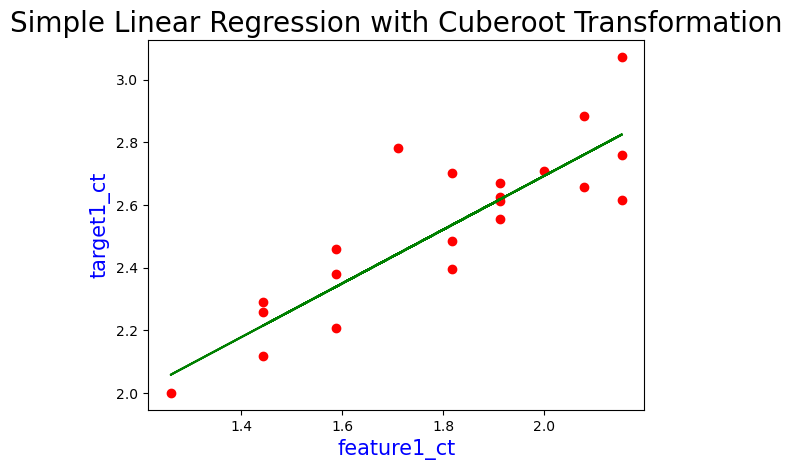

In [57]:
plt.scatter(df1['feature1_ct'], df1['target1_ct'],color='red')
plt.xlabel('feature1_ct',size=15,color='blue')
plt.ylabel('target1_ct',size=15,color='blue')
plt.title('Simple Linear Regression with Cuberoot Transformation',size=20,color='black')
plt.plot(df1['feature1_ct'],model_ct.predict(df1[['feature1_ct']]),color='green')
plt.show()

### Reciprocal Transformation

In [58]:
df1[['feature1_rt','target1_rt']]=1/(df1[['Sorting Time','Delivery Time']])
df1

,Delivery Time,Sorting Time,feature1_st,target1_st,feature1_lt,target1_lt,feature1_ct,target1_ct,feature1_rt,target1_rt
0,21.00,10,3.162278,4.582576,2.302585,3.044522,2.154435,2.758924,0.100000,0.047619
1,13.50,4,2.000000,3.674235,1.386294,2.602690,1.587401,2.381102,0.250000,0.074074
2,19.75,6,2.449490,4.444097,1.791759,2.983153,1.817121,2.703060,0.166667,0.050633
3,24.00,9,3.000000,4.898979,2.197225,3.178054,2.080084,2.884499,0.111111,0.041667
4,29.00,10,3.162278,5.385165,2.302585,3.367296,2.154435,3.072317,0.100000,0.034483
5,15.35,6,2.449490,3.917908,1.791759,2.731115,1.817121,2.485246,0.166667,0.065147
6,19.00,7,2.645751,4.358899,1.945910,2.944439,1.912931,2.668402,0.142857,0.052632
7,9.50,3,1.732051,3.082207,1.098612,2.251292,1.442250,2.117912,0.333333,0.105263
8,17.90,10,3.162278,4.230839,2.302585,2.884801,2.154435,2.615879,0.100000,0.055866
9,18.75,9,3.000000,4.330127,2.197225,2.931194,2.080084,2.656646,0.111111,0.053333


In [59]:
target1_rt=df1[['target1_rt']]
target1_rt

,target1_rt
0,0.047619
1,0.074074
2,0.050633
3,0.041667
4,0.034483
5,0.065147
6,0.052632
7,0.105263
8,0.055866
9,0.053333


In [60]:
feature1_rt=df1[['feature1_rt']]
feature1_rt

,feature1_rt
0,0.100000
1,0.250000
2,0.166667
3,0.111111
4,0.100000
5,0.166667
6,0.142857
7,0.333333
8,0.100000
9,0.111111


In [61]:
model_rt=LinearRegression()

In [62]:
x_train1,x_test1,y_train1,y_test1=train_test_split(feature1_rt,target1_rt,train_size=0.75,random_state=3)

In [63]:
model_rt.fit(x_train1,y_train1)

LinearRegression()

In [64]:
y_pred1=model_rt.predict(x_test1)
y_pred1

array([[0.05565847],
       [0.09650496],
       [0.07863462],
       [0.06076428],
       [0.13224563],
       [0.07863462]])

In [65]:
model_rt.score(x_test1,y_test1)

0.890661269844628

In [66]:
model_rt.intercept_

array([0.02502361])

In [67]:
model_rt.coef_

array([[0.21444405]])

In [68]:
rmse1=np.sqrt(mean_squared_error(y_test1,y_pred1))
rmse1

0.008144009465330245

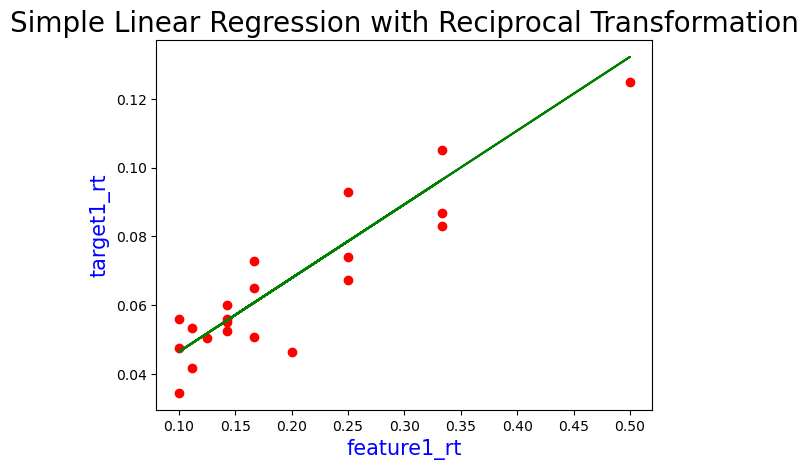

In [69]:
plt.scatter(df1['feature1_rt'], df1['target1_rt'],color='red')
plt.xlabel('feature1_rt',size=15,color='blue')
plt.ylabel('target1_rt',size=15,color='blue')
plt.title('Simple Linear Regression with Reciprocal Transformation',size=20,color='black')
plt.plot(df1['feature1_rt'],model_rt.predict(df1[['feature1_rt']]),color='green')
plt.show()

### Power Transformation

In [70]:
df1[['feature1_pt','target1_pt']]=np.power(df1[['Sorting Time','Delivery Time']],2)
df1

,Delivery Time,Sorting Time,feature1_st,target1_st,feature1_lt,target1_lt,feature1_ct,target1_ct,feature1_rt,target1_rt,feature1_pt,target1_pt
0,21.00,10,3.162278,4.582576,2.302585,3.044522,2.154435,2.758924,0.100000,0.047619,100,441.0000
1,13.50,4,2.000000,3.674235,1.386294,2.602690,1.587401,2.381102,0.250000,0.074074,16,182.2500
2,19.75,6,2.449490,4.444097,1.791759,2.983153,1.817121,2.703060,0.166667,0.050633,36,390.0625
3,24.00,9,3.000000,4.898979,2.197225,3.178054,2.080084,2.884499,0.111111,0.041667,81,576.0000
4,29.00,10,3.162278,5.385165,2.302585,3.367296,2.154435,3.072317,0.100000,0.034483,100,841.0000
5,15.35,6,2.449490,3.917908,1.791759,2.731115,1.817121,2.485246,0.166667,0.065147,36,235.6225
6,19.00,7,2.645751,4.358899,1.945910,2.944439,1.912931,2.668402,0.142857,0.052632,49,361.0000
7,9.50,3,1.732051,3.082207,1.098612,2.251292,1.442250,2.117912,0.333333,0.105263,9,90.2500
8,17.90,10,3.162278,4.230839,2.302585,2.884801,2.154435,2.615879,0.100000,0.055866,100,320.4100
9,18.75,9,3.000000,4.330127,2.197225,2.931194,2.080084,2.656646,0.111111,0.053333,81,351.5625


In [71]:
target1_pt=df1[['target1_pt']]
target1_pt

,target1_pt
0,441.0000
1,182.2500
2,390.0625
3,576.0000
4,841.0000
5,235.6225
6,361.0000
7,90.2500
8,320.4100
9,351.5625


In [72]:
feature1_pt=df1[['feature1_pt']]
feature1_pt

,feature1_pt
0,100
1,16
2,36
3,81
4,100
5,36
6,49
7,9
8,100
9,81


In [73]:
model_pt=LinearRegression()

In [74]:
x_train1,x_test1,y_train1,y_test1=train_test_split(feature1_pt,target1_pt,train_size=0.75,random_state=3)

In [75]:
model_pt.fit(x_train1,y_train1)

LinearRegression()

In [76]:
y_pred1=model_pt.predict(x_test1)
y_pred1

array([[322.21505668],
       [151.41015822],
       [181.30101545],
       [266.70346468],
       [130.05954591],
       [181.30101545]])

In [77]:
model_pt.score(x_test1,y_test1)

0.7000954590827067

In [78]:
model_pt.intercept_

array([112.97905606])

In [79]:
model_pt.coef_

array([[4.27012246]])

In [80]:
rmse1=np.sqrt(mean_squared_error(y_test1,y_pred1))
rmse1

59.96798318216129

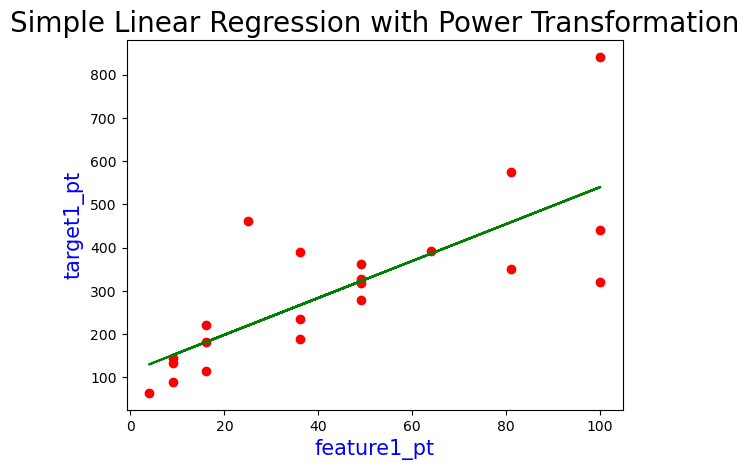

In [81]:
plt.scatter(df1['feature1_pt'], df1['target1_pt'],color='red')
plt.xlabel('feature1_pt',size=15,color='blue')
plt.ylabel('target1_pt',size=15,color='blue')
plt.title('Simple Linear Regression with Power Transformation',size=20,color='black')
plt.plot(df1['feature1_pt'],model_pt.predict(df1[['feature1_pt']]),color='green')
plt.show()

In [82]:
# 2) Salary_hike -> Build a prediction model for Salary_hike

In [83]:
df2= pd.read_csv('Salary_Data.csv')
df2

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [84]:
df2.shape

(30, 2)

In [85]:
df2.size

60

In [86]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [87]:
df2.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [88]:
df2.duplicated().any()

False

In [89]:
target2=df2[['Salary']]
target2

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


In [90]:
feature2=df2.drop('Salary',axis=1)
feature2

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [91]:
feature2['YearsExperience']

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64

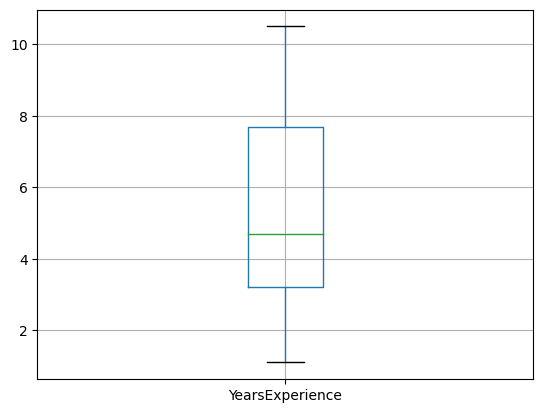

In [92]:
feature2.boxplot('YearsExperience')
plt.show()

In [93]:
x_train2,x_test2,y_train2,y_test2=train_test_split(feature2,target2,train_size=0.75,random_state=6)

In [94]:
lin_model= LinearRegression()

In [95]:
lin_model.fit(x_train2,y_train2)

LinearRegression()

In [96]:
y_pred2=lin_model.predict(x_test2)
y_pred2

array([[ 33795.29292565],
       [123437.3815381 ],
       [116616.78783933],
       [ 52308.33296518],
       [ 74718.85511829],
       [ 81539.44881707],
       [ 54257.07402197],
       [ 51333.96243678]])

In [97]:
lin_model.score(x_test2,y_test2)

0.9424206832893612

In [98]:
lin_model.intercept_

array([23077.21711329])

In [99]:
lin_model.coef_

array([[9743.70528396]])

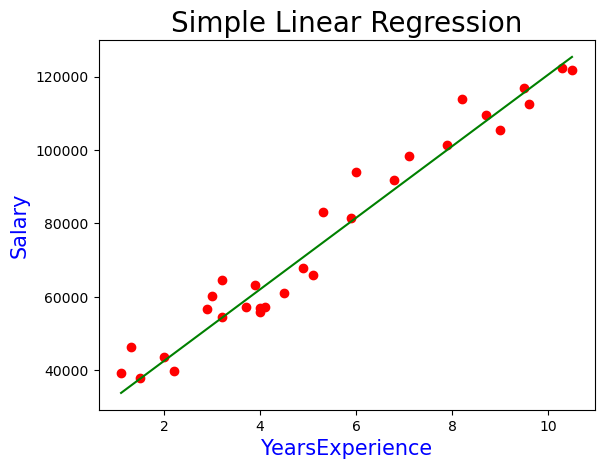

In [100]:
plt.scatter(df2['YearsExperience'], df2['Salary'],color='red')
plt.xlabel('YearsExperience',size=15,color='blue')
plt.ylabel('Salary',size=15,color='blue')
plt.title('Simple Linear Regression',size=20,color='black')
plt.plot(df2['YearsExperience'], lin_model.predict(df2[['YearsExperience']]),color='green')
plt.show()

### Squareroot Transformation

In [101]:
df2[['feature2_st','target2_st']]=np.sqrt(df2[['YearsExperience','Salary']])
df2

,YearsExperience,Salary,feature2_st,target2_st
0,1.1,39343.0,1.048809,198.350700
1,1.3,46205.0,1.140175,214.953483
2,1.5,37731.0,1.224745,194.244691
3,2.0,43525.0,1.414214,208.626460
4,2.2,39891.0,1.483240,199.727314
5,2.9,56642.0,1.702939,237.995798
6,3.0,60150.0,1.732051,245.254969
7,3.2,54445.0,1.788854,233.334524
8,3.2,64445.0,1.788854,253.860198
9,3.7,57189.0,1.923538,239.142217


In [102]:
target2_st=df2[['target2_st']]
target2_st

,target2_st
0,198.350700
1,214.953483
2,194.244691
3,208.626460
4,199.727314
5,237.995798
6,245.254969
7,233.334524
8,253.860198
9,239.142217


In [103]:
feature2_st=df2[['feature2_st']]
feature2_st

,feature2_st
0,1.048809
1,1.140175
2,1.224745
3,1.414214
4,1.483240
5,1.702939
6,1.732051
7,1.788854
8,1.788854
9,1.923538


In [104]:
model_st=LinearRegression()

In [105]:
x_train2,x_test2,y_train2,y_test2=train_test_split(feature2_st,target2_st,train_size=0.75,random_state=3)

In [106]:
model_st.fit(x_train2,y_train2)

LinearRegression()

In [107]:
y_pred2=model_st.predict(x_test2)
y_pred2

array([[272.61148731],
       [234.52942769],
       [317.14007616],
       [337.38811991],
       [288.67469493],
       [265.73016884],
       [258.5355875 ],
       [198.86821297]])

In [108]:
model_st.score(x_test2,y_test2)

0.941048037318143

In [109]:
model_st.intercept_

array([107.53308271])

In [110]:
model_st.coef_

array([[74.57482158]])

In [111]:
rmse2=np.sqrt(mean_squared_error(y_test2,y_pred2))
rmse2

10.833714957938474

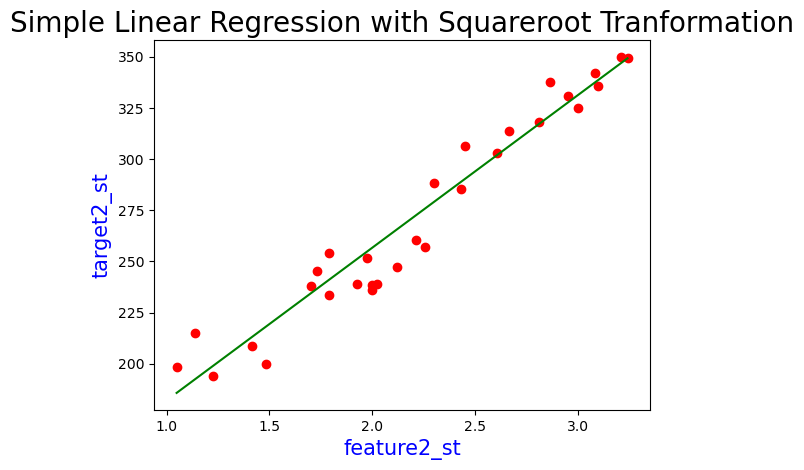

In [112]:
plt.scatter(df2['feature2_st'], df2['target2_st'],color='red')
plt.xlabel('feature2_st',size=15,color='blue')
plt.ylabel('target2_st',size=15,color='blue')
plt.title('Simple Linear Regression with Squareroot Tranformation',size=20,color='black')
plt.plot(df2['feature2_st'],model_st.predict(df2[['feature2_st']]),color='green')
plt.show()

### Log Transformation

In [113]:
df2[['feature2_lt','target2_lt']]=np.log(df2[['YearsExperience','Salary']])
df2

,YearsExperience,Salary,feature2_st,target2_st,feature2_lt,target2_lt
0,1.1,39343.0,1.048809,198.350700,0.095310,10.580073
1,1.3,46205.0,1.140175,214.953483,0.262364,10.740843
2,1.5,37731.0,1.224745,194.244691,0.405465,10.538237
3,2.0,43525.0,1.414214,208.626460,0.693147,10.681091
4,2.2,39891.0,1.483240,199.727314,0.788457,10.593906
5,2.9,56642.0,1.702939,237.995798,1.064711,10.944506
6,3.0,60150.0,1.732051,245.254969,1.098612,11.004597
7,3.2,54445.0,1.788854,233.334524,1.163151,10.904946
8,3.2,64445.0,1.788854,253.860198,1.163151,11.073567
9,3.7,57189.0,1.923538,239.142217,1.308333,10.954117


In [114]:
target2_lt=df2[['target2_lt']]
target2_lt

,target2_lt
0,10.580073
1,10.740843
2,10.538237
3,10.681091
4,10.593906
5,10.944506
6,11.004597
7,10.904946
8,11.073567
9,10.954117


In [115]:
feature2_lt=df2[['feature2_lt']]
feature2_lt

,feature2_lt
0,0.095310
1,0.262364
2,0.405465
3,0.693147
4,0.788457
5,1.064711
6,1.098612
7,1.163151
8,1.163151
9,1.308333


In [116]:
model_lt=LinearRegression()

In [117]:
x_train2,x_test2,y_train2,y_test2=train_test_split(feature2_lt,target2_lt,train_size=0.75,random_state=3)

In [118]:
model_lt.fit(x_train2,y_train2)

LinearRegression()

In [119]:
y_pred2=model_lt.predict(x_test2)
y_pred2

array([[11.23516368],
       [10.94568392],
       [11.49876152],
       [11.60054604],
       [11.33765911],
       [11.18816595],
       [11.13679028],
       [10.5818529 ]])

In [120]:
model_lt.score(x_test2,y_test2)

0.9091537682004167

In [121]:
model_lt.intercept_

array([10.3580808])

In [122]:
model_lt.coef_

array([[0.55188992]])

In [123]:
rmse2=np.sqrt(mean_squared_error(y_test2,y_pred2))
rmse2

0.10149444865313385

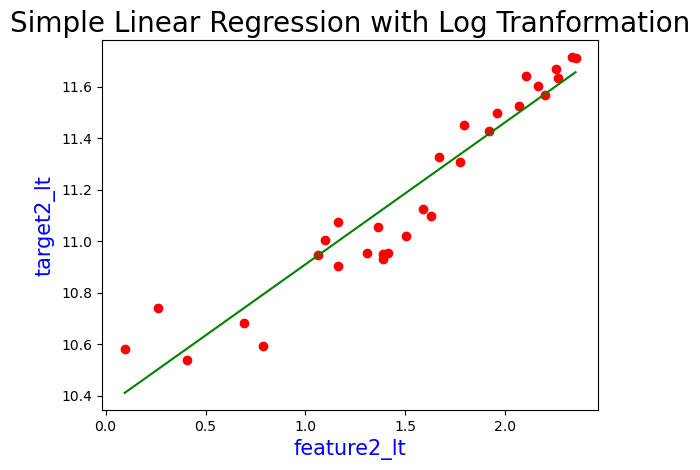

In [124]:
plt.scatter(df2['feature2_lt'], df2['target2_lt'],color='red')
plt.xlabel('feature2_lt',size=15,color='blue')
plt.ylabel('target2_lt',size=15,color='blue')
plt.title('Simple Linear Regression with Log Tranformation',size=20,color='black')
plt.plot(df2['feature2_lt'],model_lt.predict(df2[['feature2_lt']]),color='green')
plt.show()

### Cuberoot Transformation

In [125]:
df2[['feature2_ct','target2_ct']]=np.cbrt(df2[['YearsExperience','Salary']])
df2

,YearsExperience,Salary,feature2_st,target2_st,feature2_lt,target2_lt,feature2_ct,target2_ct
0,1.1,39343.0,1.048809,198.350700,0.095310,10.580073,1.032280,34.011242
1,1.3,46205.0,1.140175,214.953483,0.262364,10.740843,1.091393,35.883626
2,1.5,37731.0,1.224745,194.244691,0.405465,10.538237,1.144714,33.540235
3,2.0,43525.0,1.414214,208.626460,0.693147,10.681091,1.259921,35.175984
4,2.2,39891.0,1.483240,199.727314,0.788457,10.593906,1.300591,34.168426
5,2.9,56642.0,1.702939,237.995798,1.064711,10.944506,1.426043,38.404271
6,3.0,60150.0,1.732051,245.254969,1.098612,11.004597,1.442250,39.181273
7,3.2,54445.0,1.788854,233.334524,1.163151,10.904946,1.473613,37.901174
8,3.2,64445.0,1.788854,253.860198,1.163151,11.073567,1.473613,40.092494
9,3.7,57189.0,1.923538,239.142217,1.308333,10.954117,1.546680,38.527500


In [126]:
target2_ct=df2[['target2_ct']]
target2_ct

,target2_ct
0,34.011242
1,35.883626
2,33.540235
3,35.175984
4,34.168426
5,38.404271
6,39.181273
7,37.901174
8,40.092494
9,38.527500


In [127]:
feature2_ct=df2[['feature2_ct']]
feature2_ct

,feature2_ct
0,1.032280
1,1.091393
2,1.144714
3,1.259921
4,1.300591
5,1.426043
6,1.442250
7,1.473613
8,1.473613
9,1.546680


In [128]:
model_ct=LinearRegression()

In [129]:
x_train2,x_test2,y_train2,y_test2=train_test_split(feature2_ct,target2_ct,train_size=0.75,random_state=3)

In [130]:
model_ct.fit(x_train2,y_train2)

LinearRegression()

In [131]:
y_pred2=model_ct.predict(x_test2)
y_pred2

array([[42.13868305],
       [38.13923489],
       [46.44164419],
       [48.29533977],
       [43.73093443],
       [41.44089623],
       [40.70043198],
       [34.00954079]])

In [132]:
model_ct.score(x_test2,y_test2)

0.9315236806484061

In [133]:
model_ct.intercept_

array([17.20600735])

In [134]:
model_ct.coef_

array([[14.67923855]])

In [135]:
rmse2=np.sqrt(mean_squared_error(y_test2,y_pred2))
rmse2

1.2078914563771233

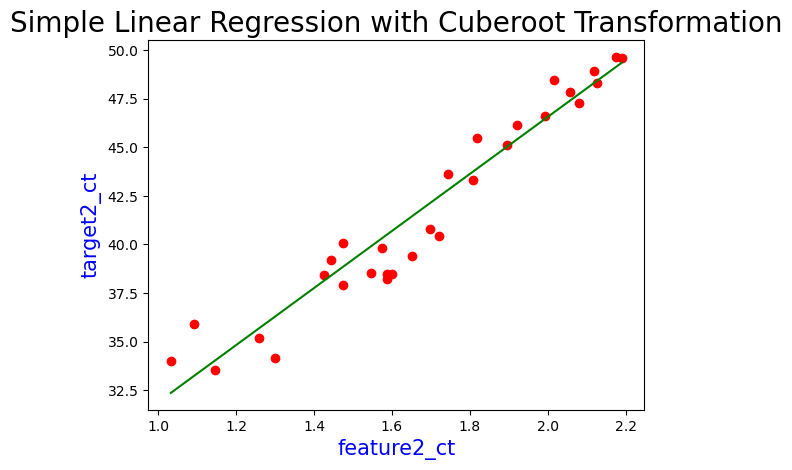

In [136]:
plt.scatter(df2['feature2_ct'], df2['target2_ct'],color='red')
plt.xlabel('feature2_ct',size=15,color='blue')
plt.ylabel('target2_ct',size=15,color='blue')
plt.title('Simple Linear Regression with Cuberoot Transformation',size=20,color='black')
plt.plot(df2['feature2_ct'],model_ct.predict(df2[['feature2_ct']]),color='green')
plt.show()

### Reciprocal Transformation

In [137]:
df2[['feature2_rt','target2_rt']]=1/(df2[['YearsExperience','Salary']])
df2

,YearsExperience,Salary,feature2_st,target2_st,feature2_lt,target2_lt,feature2_ct,target2_ct,feature2_rt,target2_rt
0,1.1,39343.0,1.048809,198.350700,0.095310,10.580073,1.032280,34.011242,0.909091,0.000025
1,1.3,46205.0,1.140175,214.953483,0.262364,10.740843,1.091393,35.883626,0.769231,0.000022
2,1.5,37731.0,1.224745,194.244691,0.405465,10.538237,1.144714,33.540235,0.666667,0.000027
3,2.0,43525.0,1.414214,208.626460,0.693147,10.681091,1.259921,35.175984,0.500000,0.000023
4,2.2,39891.0,1.483240,199.727314,0.788457,10.593906,1.300591,34.168426,0.454545,0.000025
5,2.9,56642.0,1.702939,237.995798,1.064711,10.944506,1.426043,38.404271,0.344828,0.000018
6,3.0,60150.0,1.732051,245.254969,1.098612,11.004597,1.442250,39.181273,0.333333,0.000017
7,3.2,54445.0,1.788854,233.334524,1.163151,10.904946,1.473613,37.901174,0.312500,0.000018
8,3.2,64445.0,1.788854,253.860198,1.163151,11.073567,1.473613,40.092494,0.312500,0.000016
9,3.7,57189.0,1.923538,239.142217,1.308333,10.954117,1.546680,38.527500,0.270270,0.000017


In [138]:
target2_rt=df2[['target2_rt']]
target2_rt

,target2_rt
0,0.000025
1,0.000022
2,0.000027
3,0.000023
4,0.000025
5,0.000018
6,0.000017
7,0.000018
8,0.000016
9,0.000017


In [139]:
feature2_rt=df2[['feature2_rt']]
feature2_rt

,feature2_rt
0,0.909091
1,0.769231
2,0.666667
3,0.500000
4,0.454545
5,0.344828
6,0.333333
7,0.312500
8,0.312500
9,0.270270


In [140]:
model_rt=LinearRegression()

In [141]:
x_train2,x_test2,y_train2,y_test2=train_test_split(feature2_rt,target2_rt,train_size=0.75,random_state=3)

In [142]:
model_rt.fit(x_train2,y_train2)

LinearRegression()

In [143]:
y_pred2=model_rt.predict(x_test2)
y_pred2

array([[1.31663373e-05],
       [1.63350265e-05],
       [1.14215527e-05],
       [1.09415839e-05],
       [1.23875916e-05],
       [1.35747461e-05],
       [1.40628445e-05],
       [2.35807625e-05]])

In [144]:
model_rt.score(x_test2,y_test2)

0.8168386398497053

In [145]:
model_rt.intercept_

array([8.5717379e-06])

In [146]:
model_rt.coef_

array([[2.25135369e-05]])

In [147]:
rmse2=np.sqrt(mean_squared_error(y_test2,y_pred2))
rmse2

2.2514811579107532e-06

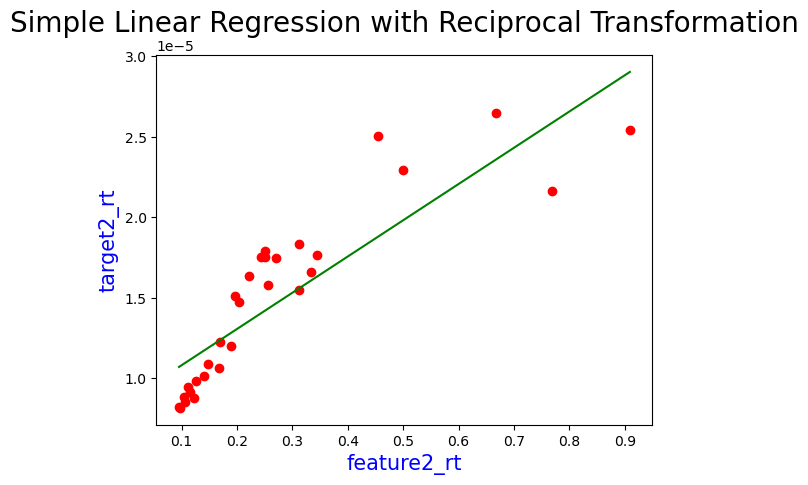

In [148]:
plt.scatter(df2['feature2_rt'], df2['target2_rt'],color='red')
plt.xlabel('feature2_rt',size=15,color='blue')
plt.ylabel('target2_rt',size=15,color='blue')
plt.title('Simple Linear Regression with Reciprocal Transformation',size=20,color='black')
plt.plot(df2['feature2_rt'],model_rt.predict(df2[['feature2_rt']]),color='green')
plt.show()

### Power Transformation

In [149]:
df2[['feature2_pt','target2_pt']]=np.power(df2[['YearsExperience','Salary']],2)
df2

,YearsExperience,Salary,feature2_st,target2_st,feature2_lt,target2_lt,feature2_ct,target2_ct,feature2_rt,target2_rt,feature2_pt,target2_pt
0,1.1,39343.0,1.048809,198.350700,0.095310,10.580073,1.032280,34.011242,0.909091,0.000025,1.21,1.547872e+09
1,1.3,46205.0,1.140175,214.953483,0.262364,10.740843,1.091393,35.883626,0.769231,0.000022,1.69,2.134902e+09
2,1.5,37731.0,1.224745,194.244691,0.405465,10.538237,1.144714,33.540235,0.666667,0.000027,2.25,1.423628e+09
3,2.0,43525.0,1.414214,208.626460,0.693147,10.681091,1.259921,35.175984,0.500000,0.000023,4.00,1.894426e+09
4,2.2,39891.0,1.483240,199.727314,0.788457,10.593906,1.300591,34.168426,0.454545,0.000025,4.84,1.591292e+09
5,2.9,56642.0,1.702939,237.995798,1.064711,10.944506,1.426043,38.404271,0.344828,0.000018,8.41,3.208316e+09
6,3.0,60150.0,1.732051,245.254969,1.098612,11.004597,1.442250,39.181273,0.333333,0.000017,9.00,3.618022e+09
7,3.2,54445.0,1.788854,233.334524,1.163151,10.904946,1.473613,37.901174,0.312500,0.000018,10.24,2.964258e+09
8,3.2,64445.0,1.788854,253.860198,1.163151,11.073567,1.473613,40.092494,0.312500,0.000016,10.24,4.153158e+09
9,3.7,57189.0,1.923538,239.142217,1.308333,10.954117,1.546680,38.527500,0.270270,0.000017,13.69,3.270582e+09


In [150]:
target2_pt=df2[['target2_pt']]
target2_pt

,target2_pt
0,1.547872e+09
1,2.134902e+09
2,1.423628e+09
3,1.894426e+09
4,1.591292e+09
5,3.208316e+09
6,3.618022e+09
7,2.964258e+09
8,4.153158e+09
9,3.270582e+09


In [151]:
feature2_pt=df2[['feature2_pt']]
feature2_pt

,feature2_pt
0,1.21
1,1.69
2,2.25
3,4.00
4,4.84
5,8.41
6,9.00
7,10.24
8,10.24
9,13.69


In [152]:
model_pt=LinearRegression()

In [153]:
x_train2,x_test2,y_train2,y_test2=train_test_split(feature2_pt,target2_pt,train_size=0.75,random_state=3)

In [154]:
model_pt.fit(x_train2,y_train2)

LinearRegression()

In [155]:
y_pred2=model_pt.predict(x_test2)
y_pred2

array([[5.06007791e+09],
       [3.09262703e+09],
       [9.90303393e+09],
       [1.34141771e+10],
       [6.42215929e+09],
       [4.58587180e+09],
       [4.15202366e+09],
       [2.31573616e+09]])

In [156]:
model_pt.score(x_test2,y_test2)

0.977046895285644

In [157]:
model_pt.intercept_

array([2.03196921e+09])

In [158]:
model_pt.coef_

array([[1.26118646e+08]])

In [159]:
rmse2=np.sqrt(mean_squared_error(y_test2,y_pred2))
rmse2

588435489.0963784

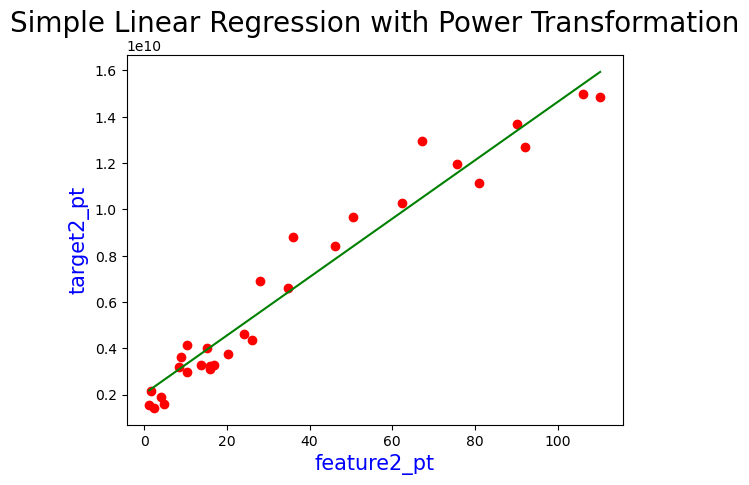

In [160]:
plt.scatter(df2['feature2_pt'], df2['target2_pt'],color='red')
plt.xlabel('feature2_pt',size=15,color='blue')
plt.ylabel('target2_pt',size=15,color='blue')
plt.title('Simple Linear Regression with Power Transformation',size=20,color='black')
plt.plot(df2['feature2_pt'],model_pt.predict(df2[['feature2_pt']]),color='green')
plt.show()